# Time-evolving Block Decimation on Finite Spin Chains

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import quimb.tensor as qtn

from tebd.hamiltonian import LocalHeisenbergHamiltonian
from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import HeisenbergHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [2]:
d = 2
N = 6
bond_dim = 2

In [3]:
lmda = 0
loc_ham_ising = LocalIsingHamiltonian(N, lmda)
glob_ham_ising = IsingHamiltonian(N, lmda)

In [4]:
loc_ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 2), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(2, 2, 2), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(2, 2, 2), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(2, 2, 2), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(2, 2), inds=('i4', 'k5'), tags=oset(['state 6']))]

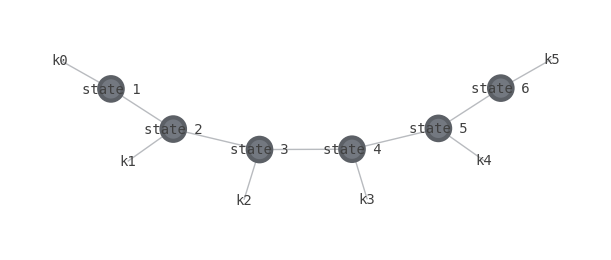

In [7]:
qtn.TensorNetwork(MPS.data).draw()

Make sure the state is normalized.

In [8]:
MPS.norm()

0.9999999999999999

Look at the density matrix.

In [9]:
rho = MPS.rho()

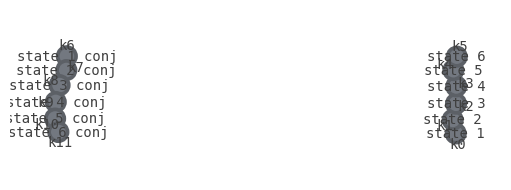

In [10]:
rho.draw(figsize=(5, 5))

Create TEBD object.

In [11]:
tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

Evolve state.

In [12]:
tau = 0.1
num_iter = 300
mid_steps = 10

The energy goes to $-N + 1 = -5$.

In [13]:
energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 300, energy: 3.5157542075200157
Iteration: 10 of 300, energy: -4.298357948161579
Iteration: 20 of 300, energy: -4.7981234741895715
Iteration: 30 of 300, energy: -4.994262907505496
Iteration: 40 of 300, energy: -4.999893756423562
Iteration: 50 of 300, energy: -4.9999980536849
Iteration: 60 of 300, energy: -4.999999964351864
Iteration: 70 of 300, energy: -4.999999999347079
Iteration: 80 of 300, energy: -4.999999999988039
Iteration: 90 of 300, energy: -4.999999999999781
Iteration: 100 of 300, energy: -4.999999999999998
Iteration: 110 of 300, energy: -5.000000000000002
Iteration: 120 of 300, energy: -5.0
Iteration: 130 of 300, energy: -5.0
Iteration: 140 of 300, energy: -4.999999999999998
Iteration: 150 of 300, energy: -4.999999999999997
Iteration: 160 of 300, energy: -5.0
Iteration: 170 of 300, energy: -5.0
Iteration: 180 of 300, energy: -5.0
Iteration: 190 of 300, energy: -4.999999999999998
Iteration: 200 of 300, energy: -5.0
Iteration: 210 of 300, energy: -4.999999999999

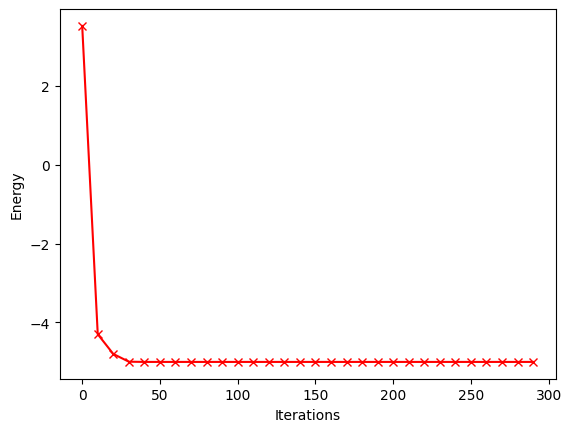

In [14]:
plt.plot(range(0, num_iter, mid_steps), energies, "rx-")
plt.xlabel("Iterations")
plt.ylabel("Energy");

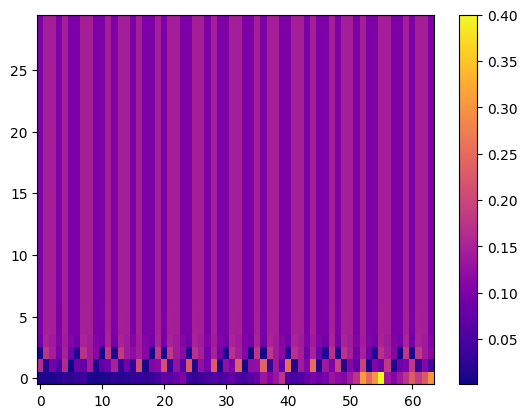

In [15]:
plt.imshow(
    np.abs(wave_functions),
    origin="lower",
    cmap="plasma",
    aspect="auto"
)
plt.colorbar();

Start with one particular state.

In [16]:
state_all_spins_up = MatrixProductState.init_from_state('000000')

In [17]:
state_all_spins_up.wave_function()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
state_all_spins_up.norm()

1.0

In [19]:
tebd_obj = TEBD(state_all_spins_up, loc_ham_ising, glob_ham_ising, evol_type="imag", bond_dim=bond_dim)

In [20]:
energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 300, energy: 0j
Iteration: 10 of 300, energy: -5.000000000000002
Iteration: 20 of 300, energy: -5.0
Iteration: 30 of 300, energy: -5.0
Iteration: 40 of 300, energy: -5.0
Iteration: 50 of 300, energy: -5.0
Iteration: 60 of 300, energy: -5.0
Iteration: 70 of 300, energy: -5.000000000000001
Iteration: 80 of 300, energy: -5.0
Iteration: 90 of 300, energy: -5.0
Iteration: 100 of 300, energy: -5.0
Iteration: 110 of 300, energy: -5.0
Iteration: 120 of 300, energy: -5.0
Iteration: 130 of 300, energy: -5.0
Iteration: 140 of 300, energy: -5.0
Iteration: 150 of 300, energy: -5.0
Iteration: 160 of 300, energy: -5.0
Iteration: 170 of 300, energy: -5.0
Iteration: 180 of 300, energy: -5.0
Iteration: 190 of 300, energy: -5.0
Iteration: 200 of 300, energy: -5.0
Iteration: 210 of 300, energy: -5.000000000000001
Iteration: 220 of 300, energy: -5.0
Iteration: 230 of 300, energy: -5.000000000000001
Iteration: 240 of 300, energy: -5.0
Iteration: 250 of 300, energy: -4.999999999999998
Iterati

Run various scenarios in batch.

In [21]:
d = 2
bond_dim = 2
lmda = 0

In [22]:
tau = 0.01
num_iter = 500
mid_steps = 100

In [23]:
N_list = range(3, 15)

In [24]:
energies = []

for N in N_list:
    # create matrix product states
    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_ising = LocalIsingHamiltonian(N, lmda)
    glob_ham_ising = IsingHamiltonian(N, lmda)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

    # run algorithm
    energies_N, wave_functions_N = run_tebd(tebd_obj, tau, num_iter, mid_steps)

    energies.append(energies_N[-1])

Iteration: 0 of 500, energy: 1.3106276628021885
Iteration: 100 of 500, energy: -1.938501045949569
Iteration: 200 of 500, energy: -1.998857389488293
Iteration: 300 of 500, energy: -1.9999790667983453
Iteration: 400 of 500, energy: -1.9999996165931715
Iteration: 0 of 500, energy: 1.9687391862387777
Iteration: 100 of 500, energy: -2.49819640730537
Iteration: 200 of 500, energy: -2.9888575915376023
Iteration: 300 of 500, energy: -2.9997951559739695
Iteration: 400 of 500, energy: -2.999996247893859
Iteration: 0 of 500, energy: 2.6285059019826233
Iteration: 100 of 500, energy: -3.4097548680707135
Iteration: 200 of 500, energy: -3.977866215435033
Iteration: 300 of 500, energy: -3.99958318266862
Iteration: 400 of 500, energy: -3.9999923617525153
Iteration: 0 of 500, energy: 4.2178379531481625
Iteration: 100 of 500, energy: -4.326434931259578
Iteration: 200 of 500, energy: -4.981346159072161
Iteration: 300 of 500, energy: -4.999654018451228
Iteration: 400 of 500, energy: -4.999993661649879
Iter

In [25]:
energies_theoretical = [-N + 1 for N in N_list]

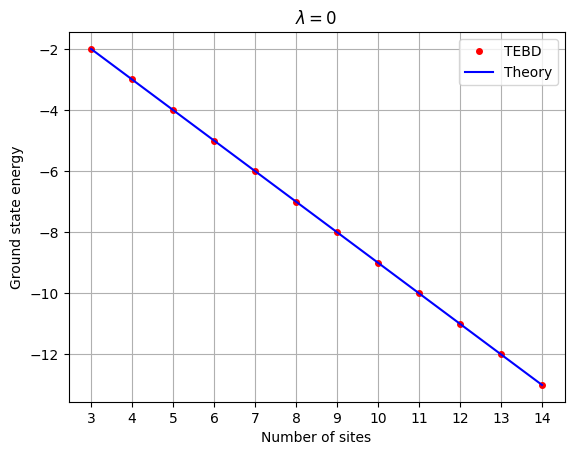

In [26]:
plt.plot(N_list, energies, 'ro', label="TEBD", markersize=4)
plt.plot(N_list, energies_theoretical, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("Ground state energy")
plt.xticks(N_list)
plt.legend()
plt.title("$\lambda=0$")
plt.grid()
plt.savefig('../figures/ground_state_energy_lambda_0.png', bbox_inches='tight', dpi=300);

Run the Heisenberg model.

In [27]:
N_list = range(3, 10)

In [28]:
d = 2
bond_dim = 2
tau = 0.01
num_iter = 500
mid_steps = 100

In [29]:
energies = []

for N in N_list:
    # create matrix product states
    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_heis = LocalHeisenbergHamiltonian(N)
    glob_ham_heis = HeisenbergHamiltonian(N)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_heis, glob_ham_heis, evol_type="imag")

    # run algorithm
    energies_N, wave_functions_N = run_tebd(tebd_obj, tau, num_iter, mid_steps)

    energies.append(energies_N[-1])

Iteration: 0 of 500, energy: 1.6449628925062356
Iteration: 100 of 500, energy: -1.0126364339965326
Iteration: 200 of 500, energy: -1.0092730152657108
Iteration: 300 of 500, energy: -1.009260825143675
Iteration: 400 of 500, energy: -1.009260710314405
Iteration: 0 of 500, energy: 2.8127282638248183
Iteration: 100 of 500, energy: -5.11842196099731
Iteration: 200 of 500, energy: -5.029796804053258
Iteration: 300 of 500, energy: -5.010997578798271
Iteration: 400 of 500, energy: -5.007638220332198
Iteration: 0 of 500, energy: 2.929484261669601
Iteration: 100 of 500, energy: -5.656463868223698
Iteration: 200 of 500, energy: -5.728903802502092
Iteration: 300 of 500, energy: -5.7286661131237455
Iteration: 400 of 500, energy: -5.728654112624686
Iteration: 0 of 500, energy: 3.811687279171463
Iteration: 100 of 500, energy: -6.532737420673661
Iteration: 200 of 500, energy: -7.37553173630207
Iteration: 300 of 500, energy: -7.217370460479286
Iteration: 400 of 500, energy: -7.180468410674347
Iteration

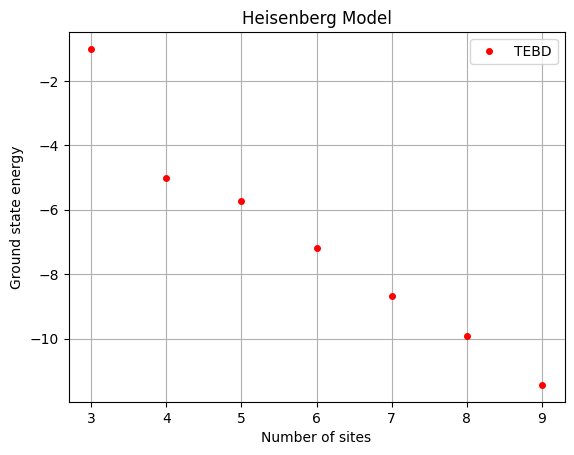

In [30]:
plt.plot(N_list, energies, 'ro', label="TEBD", markersize=4)
plt.xlabel("Number of sites")
plt.ylabel("Ground state energy")
plt.xticks(N_list)
plt.legend()
plt.title("Heisenberg Model")
plt.grid();